bool 0 0 other 1
tuple cant be modified

In [2]:
import pandas as pd   #importing libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_abalone=pd.read_csv(r"C:\Users\ishme\Desktop\abalone.csv") #loading csv
df1=df_abalone.copy()

list_of_attributes=list(df_abalone.columns)
list_of_attributes.remove('Rings')

#print(len(list_of_attributes_1))
X = df1.drop(columns="Rings")
#separate target values
y = df_abalone["Rings"].values #target variable

train, test=train_test_split(df1,test_size=0.3, random_state=42, shuffle=True)  #split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [4]:
y_train_r=np.reshape(y_train,(np.shape(y_train)[0],1))   #reshaping
y_test_r=np.reshape(y_test,(np.shape(y_test)[0],1))

In [5]:
correlation={} #finding out feature for which correlation is maximum
for attribute in list_of_attributes:
    corr=df_abalone['Rings'].corr(df1[attribute])
    print("Pearson correlation coefficient value of column ",attribute,"and column Rings is : ",corr)
    correlation[attribute]=corr
value=list(correlation.values())
key=list(correlation.keys())
attribute_max=key[value.index(max(value))]
print("attribute for which Pearson correlation coefficient with the target attribute Rings  is maximum is ",attribute_max)
#print("Attribute with the highest Pearson correlation coefficient with the target attribute Rings is Shell")

Pearson correlation coefficient value of column  Length and column Rings is :  0.5567195769296182
Pearson correlation coefficient value of column  Diameter and column Rings is :  0.5746598513059192
Pearson correlation coefficient value of column  Height and column Rings is :  0.5574673244580374
Pearson correlation coefficient value of column  Whole weight and column Rings is :  0.540389676923901
Pearson correlation coefficient value of column  Shucked weight and column Rings is :  0.4208836579452145
Pearson correlation coefficient value of column  Viscera weight and column Rings is :  0.5038192487597714
Pearson correlation coefficient value of column  Shell weight and column Rings is :  0.6275740445103217
attribute for which Pearson correlation coefficient with the target attribute Rings  is maximum is  Shell weight


In [6]:
# Load our data set for univariate regression
input_train = train[attribute_max]   #features
rings_train = train["Rings"]  #target value
input_test=test[attribute_max]
input_test_1=input_test.to_numpy()

input_test_1_r=np.array(input_test_1).reshape(-1,1)

input_train_r=np.array(input_train).reshape(-1,1)
rings_train_r=np.array(rings_train).reshape(-1,1)

In [7]:
reg = LinearRegression().fit(input_train_r, rings_train_r) #Univariate linear regression model

y_pred_test = reg.predict(input_test_1_r) #predictions on training dataset

y_pred_train=reg.predict(input_train_r)#predictions on testing data

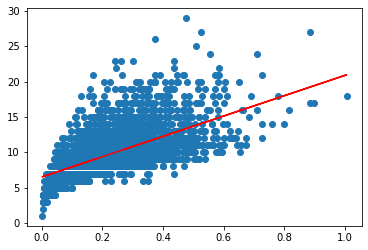

In [8]:
plt.scatter(input_train_r,train["Rings"])#plotting best fit line for train data
plt.plot(input_train_r,y_pred_train,"r")
plt.show()

In [9]:
MSE_train=(mean_squared_error(train["Rings"],y_pred_train))**0.5  #calculating rmse for testing and training data
print("prediction accuracy on the test data using root mean squared error",MSE_train)

prediction accuracy on the test data using root mean squared error 2.527846339134725


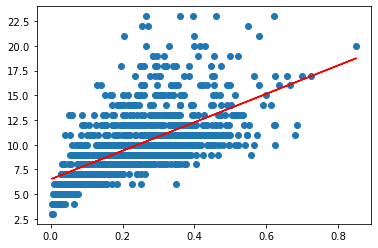

In [10]:
plt.scatter(input_test_1_r,test["Rings"])
plt.plot(input_test_1_r,y_pred_test,"r")
plt.show()

In [11]:
RMSE_test=(mean_squared_error(test["Rings"],y_pred_test))**0.5
print("prediction accuracy on the test data using root mean squared error",RMSE_test)

prediction accuracy on the test data using root mean squared error 2.467940147010543


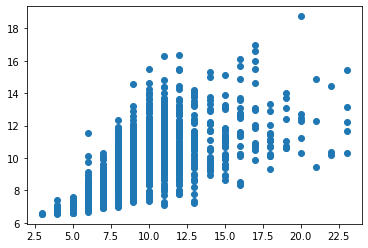

In [12]:
plt.scatter(test["Rings"],y_pred_test)

Text(0.5, 1.0, 'Univariate linear regression model')

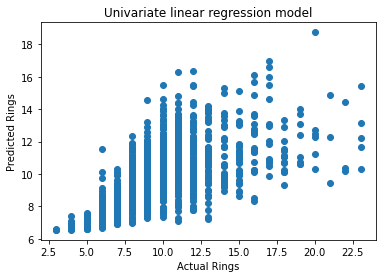

In [13]:
plt.scatter(test["Rings"],y_pred_test)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Univariate linear regression model')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [15]:
reg = LinearRegression().fit(X_train, y_train) #model for multivariate linear regression

y_pred_test = reg.predict(X_test)

y_pred_train=reg.predict(X_train)

In [16]:
rmse_train = (mean_squared_error(y_train, reg.predict(X_train))) ** 0.5#rmse calculation

print("prediction accuracy on the train data using root mean squared error", rmse_train)


prediction accuracy on the train data using root mean squared error 2.216182487730409


In [17]:
rmse_test = (mean_squared_error(y_test, reg.predict(X_test))) ** 0.5
print("prediction accuracy on the test data using root mean squared error", rmse_test)

prediction accuracy on the test data using root mean squared error 2.2192193506637916


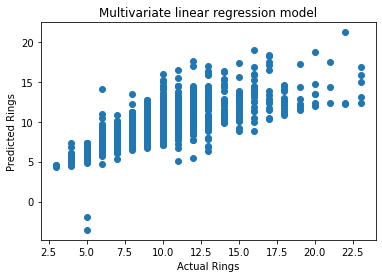

In [18]:
plt.scatter(y_test, reg.predict(X_test))
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Multivariate linear regression model')
plt.show()

In [19]:

RMSE = []
for p in range(2,6):
    poly_feature = PolynomialFeatures(p)
    x_poly = poly_feature.fit_transform(input_train_r)
    
    reg = LinearRegression()
    reg.fit(x_poly, y_train_r)
    y_predictta = reg.predict(x_poly)#prediction using model                 
    rmse = (mean_squared_error(y_train, y_predictta)) ** 0.5#rmse calculation for train data
    RMSE.append(rmse)
    
    print("RMSE for p=", p, 'is', rmse)

RMSE for p= 2 is 2.4992973530791507
RMSE for p= 3 is 2.47566923544359
RMSE for p= 4 is 2.4671948386515963
RMSE for p= 5 is 2.465950052620803


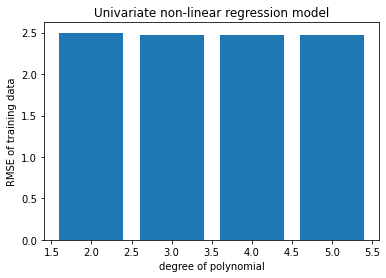

In [20]:
plt.bar([2,3,4,5], RMSE)
plt.xlabel('degree of polynomial')
plt.ylabel('RMSE of training data')
plt.title("Univariate non-linear regression model")
plt.show()

In [21]:
RMSE = []
for p in range(2,6):
    poly_feature = PolynomialFeatures(p)#degree is p
    x_poly = poly_feature.fit_transform(input_train_r)
    reg = LinearRegression()
    reg.fit(x_poly, y_train)
    x_test_poly = poly_feature.fit_transform(input_test_1_r)
    y_predict = reg.predict(x_test_poly)
    rmse = (mean_squared_error(y_test, y_predict)) ** 0.5
    RMSE.append(rmse)
    print("RMSE for ", p, 'is', rmse)
    

RMSE for  2 is 2.4337609762689443
RMSE for  3 is 2.4106216818397996
RMSE for  4 is 2.408325167064195
RMSE for  5 is 2.409543518394249


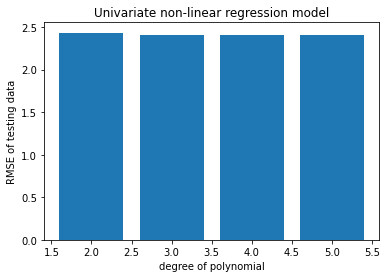

In [22]:
plt.bar([2,3,4,5], RMSE)
plt.xlabel('degree of polynomial')
plt.ylabel('RMSE of testing data')
plt.title("Univariate non-linear regression model")
plt.show()

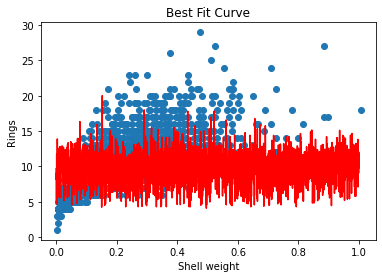

In [23]:
x_poly = PolynomialFeatures(4).fit_transform(input_train_r)

reg = LinearRegression()
reg.fit(x_poly, train['Rings'])
y = reg.predict(x_poly)
plt.scatter(train['Shell weight'], train['Rings'])

plt.plot(np.linspace(0, 1, 2923),y_predictta,'r')
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.title('Best Fit Curve')
plt.show()


In [25]:
RMSE = []
for p in range(2,6):
    poly_feature = PolynomialFeatures(p)#Multivariate non linear regression
    x_poly = poly_feature.fit_transform(X_train)
    reg = LinearRegression()
    reg.fit(x_poly, y_train)#fit linear model
    y_predict = reg.predict(x_poly)#prediction using model
    rmse = (mean_squared_error(y_train, y_predict)) ** 0.5#rmse calculation
    RMSE.append(rmse)
    print("RMSE for", p, 'is', rmse)#printing results

RMSE for 2 is 2.079616168292698
RMSE for 3 is 1.9924180027778615
RMSE for 4 is 1.8408922784101915
RMSE for 5 is 1.6392212828034713


In [27]:
RMSE = []
for p in range(2,6):
    poly_features = PolynomialFeatures(p)#degree is p
    x_poly = poly_features.fit_transform(X_train)
    reg = LinearRegression()
    reg.fit(x_poly, y_train)
    x_test_poly = poly_features.fit_transform(X_test)
    y_predict = reg.predict(x_test_poly)
    rmse = (mean_squared_error(y_test, y_predict)) ** 0.5
    RMSE.append(rmse)
    print("RMSE for", p, 'is', rmse)
    

RMSE for 2 is 2.1846309140909566
RMSE for 3 is 2.716792036364187
RMSE for 4 is 18.916833068569208
RMSE for 5 is 437.9547649635686
